In [1]:
%matplotlib inline
#data manipulation
import numpy as np
import pandas as pd
#python imports
import math,time,random,datetime
#data visualisation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
#preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
#machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection,tree,preprocessing,metrics
from sklearn.metrics import mean_squared_error
#from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('50000 Sales Records.csv')

In [3]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/2015,897751939,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Online,H,11/20/2010,599480426,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,L,6/22/2017,538911855,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,L,2/28/2012,459845054,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,M,8/12/2010,626391351,9/13/2010,1975,205.70,117.11,406257.50,231292.25,174965.25


In [4]:
len(df)

50000

In [5]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,5.000000e+04,50000.00000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04
mean,5.497330e+08,4999.61898,265.651350,187.322482,1.323716e+06,9.331574e+05,3.905587e+05
std,2.609179e+08,2884.33508,216.916752,175.580570,1.463891e+06,1.145548e+06,3.777588e+05
min,1.000132e+08,1.00000,9.330000,6.920000,2.799000e+01,2.076000e+01,7.230000e+00
25%,3.240070e+08,2498.00000,81.730000,35.840000,2.764871e+05,1.606370e+05,9.415092e+04
50%,5.504224e+08,5017.50000,154.060000,97.440000,7.813247e+05,4.671040e+05,2.795364e+05
75%,7.767824e+08,7493.25000,421.890000,263.330000,1.808642e+06,1.190390e+06,5.642867e+05
max,9.999995e+08,10000.00000,668.270000,524.960000,6.682032e+06,5.249075e+06,1.738178e+06


In [6]:
x = pd.DataFrame()
x = df
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/2015,897751939,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Online,H,11/20/2010,599480426,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,L,6/22/2017,538911855,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,L,2/28/2012,459845054,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,M,8/12/2010,626391351,9/13/2010,1975,205.70,117.11,406257.50,231292.25,174965.25


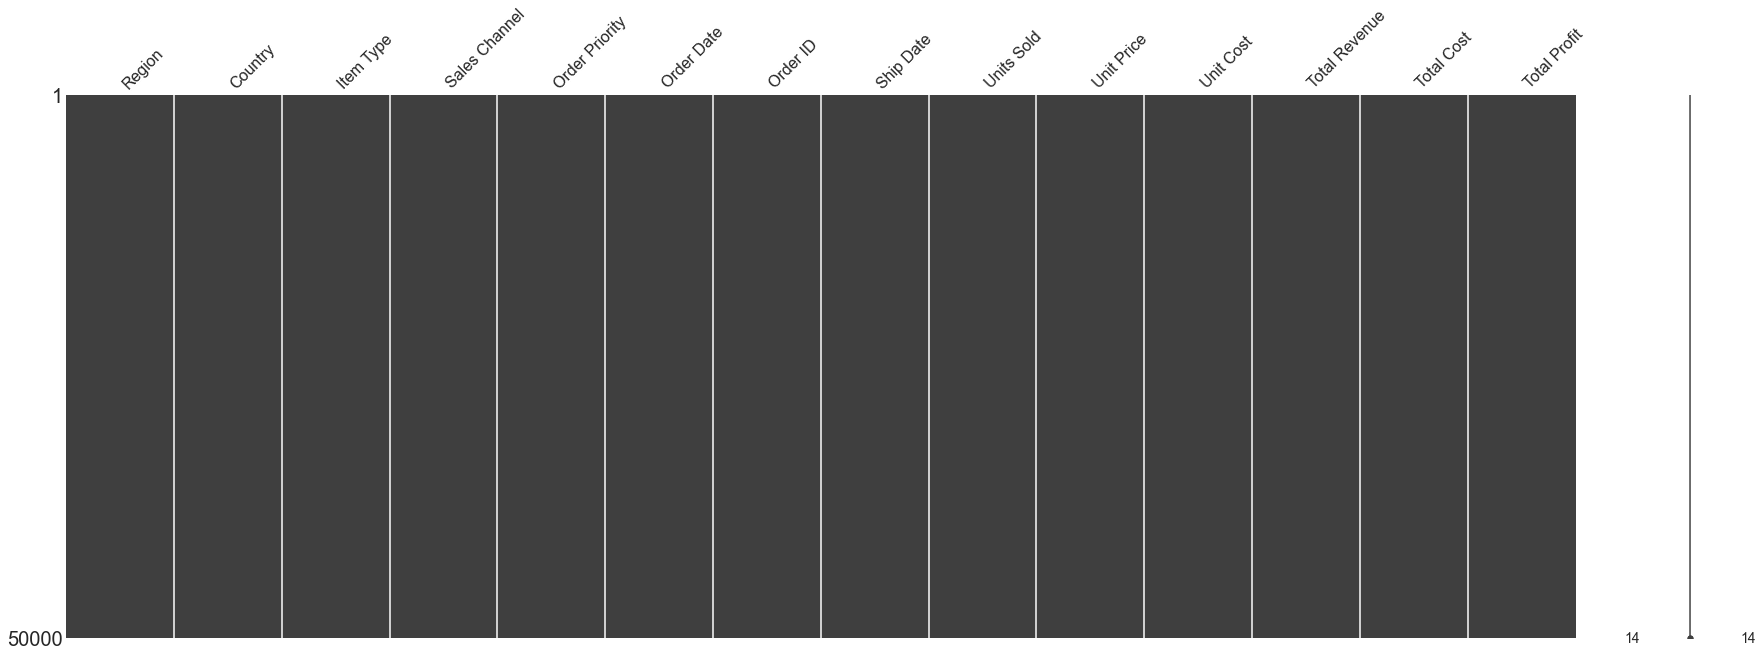

In [8]:
missingno.matrix(df, figsize=(30,10))

In [9]:
x.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [10]:
x.Region.value_counts()

Sub-Saharan Africa                   13116
Europe                               12841
Asia                                  7348
Middle East and North Africa          6128
Central America and the Caribbean     5451
Australia and Oceania                 4017
North America                         1099
Name: Region, dtype: int64

Sub-Saharan Africa                   13116
Europe                               12841
Asia                                  7348
Middle East and North Africa          6128
Central America and the Caribbean     5451
Australia and Oceania                 4017
North America                         1099
Name: Region, dtype: int64


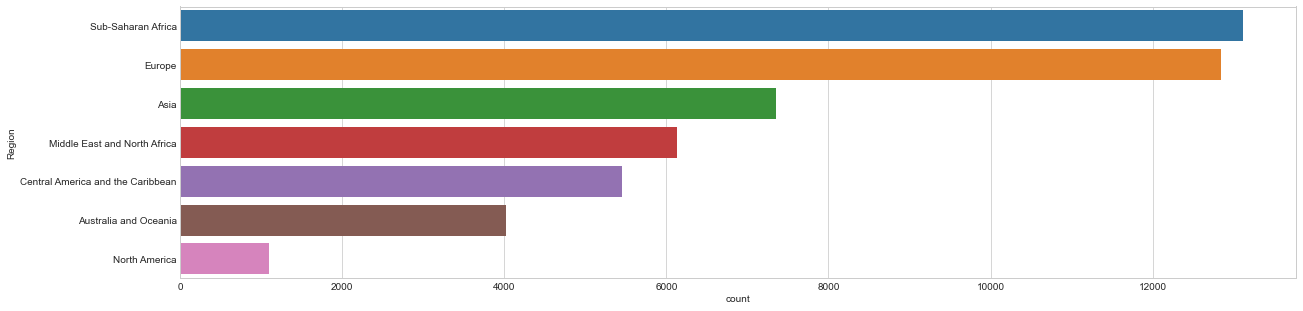

In [11]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='Region',data=x);
print(x.Region.value_counts())

In [12]:
x.Country.value_counts()

Trinidad and Tobago    321
Guinea                 318
Cape Verde             315
Maldives               311
Finland                310
                      ... 
Yemen                  238
Iran                   238
Armenia                237
Monaco                 236
Malawi                 233
Name: Country, Length: 185, dtype: int64

Trinidad and Tobago    321
Guinea                 318
Cape Verde             315
Maldives               311
Finland                310
                      ... 
Yemen                  238
Iran                   238
Armenia                237
Monaco                 236
Malawi                 233
Name: Country, Length: 185, dtype: int64


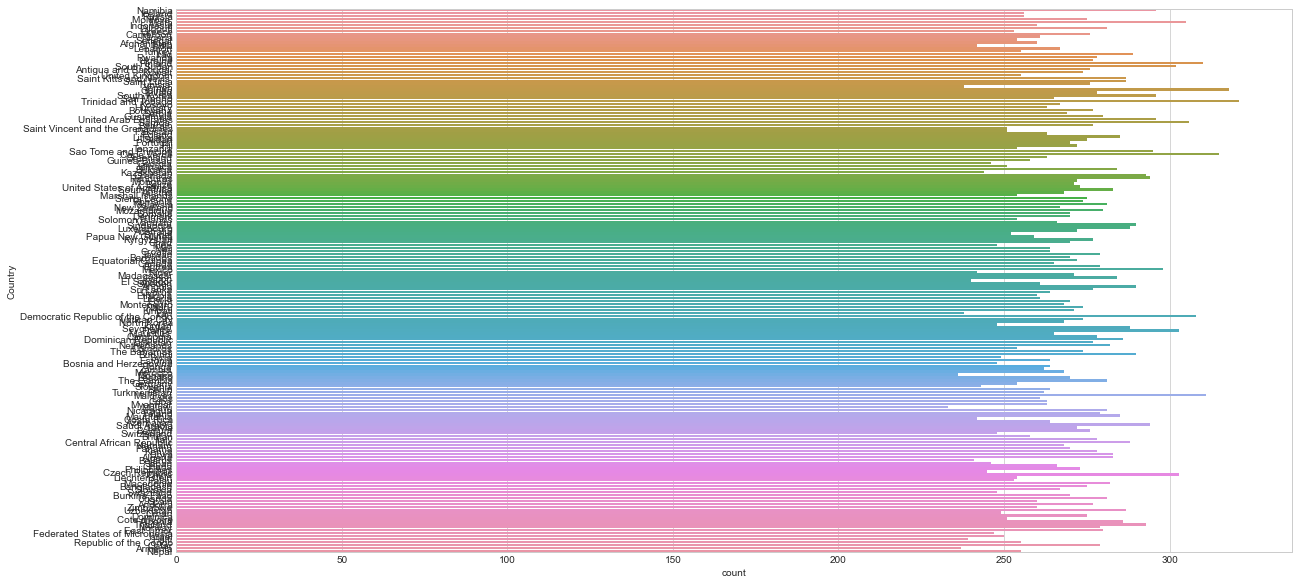

In [13]:
fig=plt.figure(figsize=(20,10))
sns.countplot(y='Country',data=x);
print(x.Country.value_counts())

In [14]:
x['Sales Channel'].value_counts()

Online     25034
Offline    24966
Name: Sales Channel, dtype: int64

Online     25034
Offline    24966
Name: Sales Channel, dtype: int64


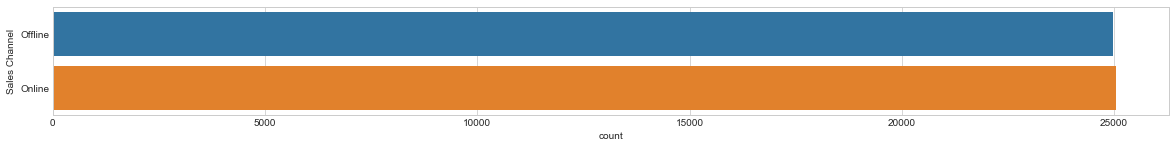

In [15]:
fig=plt.figure(figsize=(20,2))
sns.countplot(y='Sales Channel',data=x);
print(x['Sales Channel'].value_counts())

In [16]:
x['Order Priority'].value_counts()         # l-Low, M-Medium, H-High, C-Critical

L    12588
M    12495
H    12471
C    12446
Name: Order Priority, dtype: int64

L    12588
M    12495
H    12471
C    12446
Name: Order Priority, dtype: int64


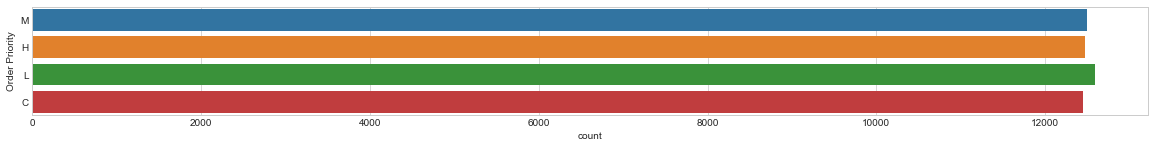

In [17]:
fig=plt.figure(figsize=(20,2))
sns.countplot(y='Order Priority',data=x);
print(x['Order Priority'].value_counts())

In [18]:
x['Item Type'].value_counts()

Meat               4221
Fruits             4221
Cosmetics          4193
Vegetables         4191
Personal Care      4186
Beverages          4173
Snacks             4163
Clothes            4155
Cereal             4141
Office Supplies    4139
Household          4139
Baby Food          4078
Name: Item Type, dtype: int64

Meat               4221
Fruits             4221
Cosmetics          4193
Vegetables         4191
Personal Care      4186
Beverages          4173
Snacks             4163
Clothes            4155
Cereal             4141
Office Supplies    4139
Household          4139
Baby Food          4078
Name: Item Type, dtype: int64


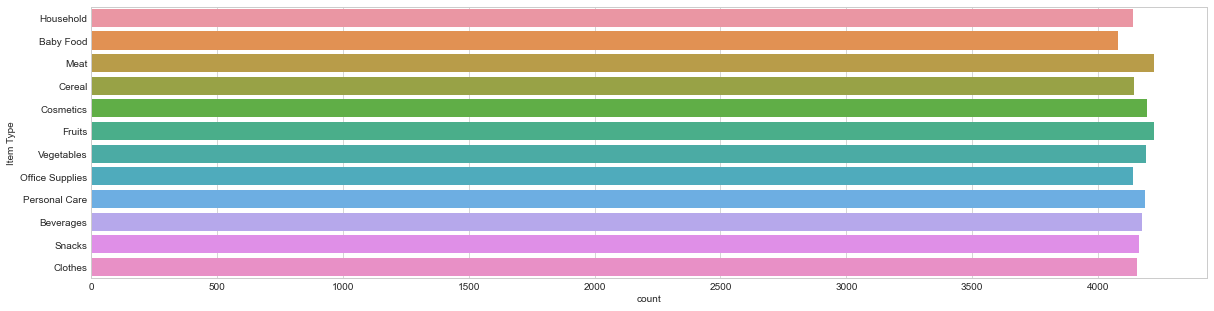

In [19]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='Item Type',data=x);
print(x['Item Type'].value_counts())

In [20]:
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/2015,897751939,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Online,H,11/20/2010,599480426,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,L,6/22/2017,538911855,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,L,2/28/2012,459845054,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,M,8/12/2010,626391351,9/13/2010,1975,205.70,117.11,406257.50,231292.25,174965.25


In [21]:
x['Order ID'].value_counts()

784031856    1
115453279    1
745377147    1
854558074    1
518488442    1
            ..
770372331    1
341703402    1
941263806    1
296584784    1
934545409    1
Name: Order ID, Length: 50000, dtype: int64

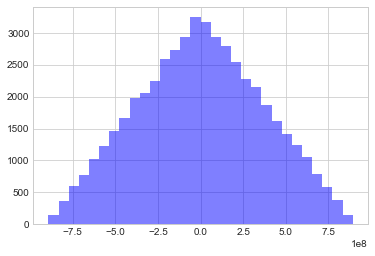

In [22]:
plt.figure()
x['Order ID'].diff().hist(color='b', alpha=0.5, bins=30)

In [23]:
x.drop('Order ID',axis=1,inplace=True)
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/2015,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Online,H,11/20/2010,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,L,6/22/2017,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,L,2/28/2012,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,M,8/12/2010,9/13/2010,1975,205.70,117.11,406257.50,231292.25,174965.25


In [24]:
x['Order Date'] = pd.to_datetime(x['Order Date'])
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,2015-08-31,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Online,H,2010-11-20,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,L,2017-06-22,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,L,2012-02-28,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,M,2010-08-12,9/13/2010,1975,205.70,117.11,406257.50,231292.25,174965.25


In [25]:
x['Ship Date'] = pd.to_datetime(x['Ship Date'])
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,2015-08-31,2015-10-12,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Online,H,2010-11-20,2011-01-09,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,L,2017-06-22,2017-06-25,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,L,2012-02-28,2012-03-20,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,M,2010-08-12,2010-09-13,1975,205.70,117.11,406257.50,231292.25,174965.25


In [26]:
x.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [27]:
x['Order Date_year'] = x['Order Date'].dt.year
x['Order Date_month'] = x['Order Date'].dt.month
x['Order Date_day'] = x['Order Date'].dt.day
x['Ship Date_year'] = x['Ship Date'].dt.year
x['Ship Date_month'] = x['Ship Date'].dt.month
x['Ship Date_day'] = x['Ship Date'].dt.day
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,Household,Offline,M,2015-08-31,2015-10-12,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,Europe,Iceland,Baby Food,Online,H,2010-11-20,2011-01-09,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,Europe,Russia,Meat,Online,L,2017-06-22,2017-06-25,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,Europe,Moldova,Meat,Online,L,2012-02-28,2012-03-20,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,Europe,Malta,Cereal,Online,M,2010-08-12,2010-09-13,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


In [28]:
x.drop('Order Date',axis=1,inplace=True)

In [29]:
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,Household,Offline,M,2015-10-12,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,Europe,Iceland,Baby Food,Online,H,2011-01-09,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,Europe,Russia,Meat,Online,L,2017-06-25,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,Europe,Moldova,Meat,Online,L,2012-03-20,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,Europe,Malta,Cereal,Online,M,2010-09-13,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


In [30]:
x.drop('Ship Date',axis=1,inplace=True)
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,Household,Offline,M,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,Europe,Iceland,Baby Food,Online,H,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,Europe,Russia,Meat,Online,L,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,Europe,Moldova,Meat,Online,L,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,Europe,Malta,Cereal,Online,M,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


24    1736
20    1715
28    1713
8     1701
4     1696
14    1691
21    1686
10    1684
18    1679
23    1671
12    1669
1     1664
22    1656
25    1656
19    1646
26    1635
9     1629
7     1628
15    1619
2     1617
16    1616
27    1612
3     1606
11    1600
13    1596
5     1567
6     1566
17    1542
29    1505
30    1482
31     917
Name: Order Date_day, dtype: int64


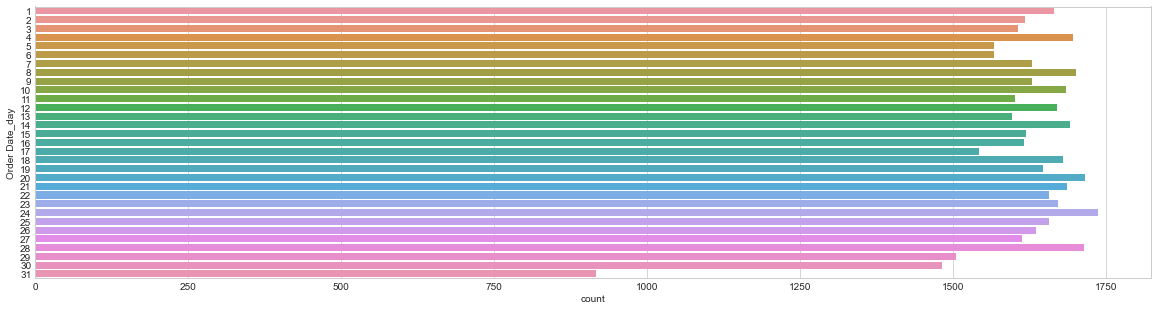

In [31]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='Order Date_day',data=x);
print(x['Order Date_day'].value_counts())

5     4571
1     4408
3     4354
7     4341
6     4311
4     4277
2     4136
12    3992
10    3948
8     3935
11    3906
9     3821
Name: Order Date_month, dtype: int64


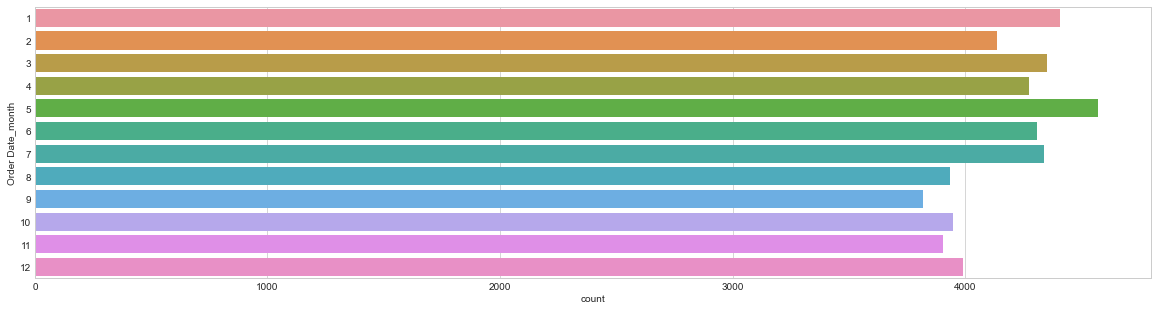

In [32]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='Order Date_month',data=x);
print(x['Order Date_month'].value_counts())

2011    6757
2012    6634
2014    6596
2010    6594
2015    6570
2016    6551
2013    6523
2017    3775
Name: Order Date_year, dtype: int64


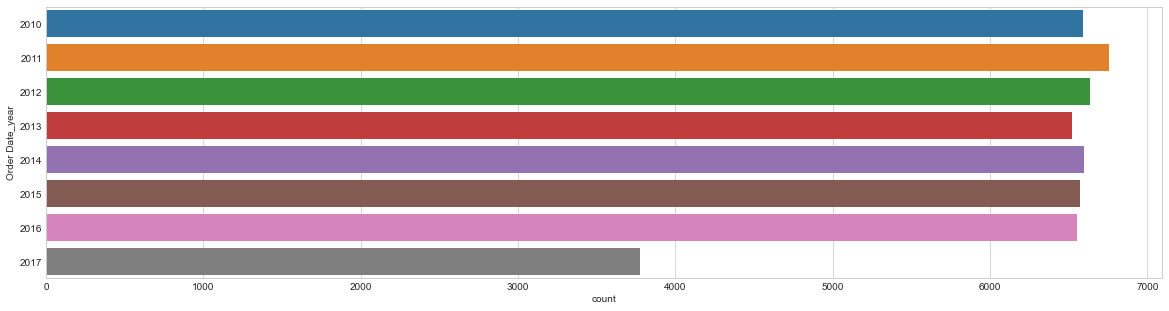

In [33]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='Order Date_year',data=x);
print(x['Order Date_year'].value_counts())

5     1718
6     1705
10    1698
12    1697
15    1696
28    1685
7     1670
23    1662
16    1658
22    1652
24    1651
18    1651
17    1646
9     1645
27    1643
14    1642
2     1642
11    1640
4     1639
21    1636
8     1628
1     1616
26    1608
3     1606
19    1604
13    1598
25    1598
20    1575
29    1504
30    1450
31     937
Name: Ship Date_day, dtype: int64


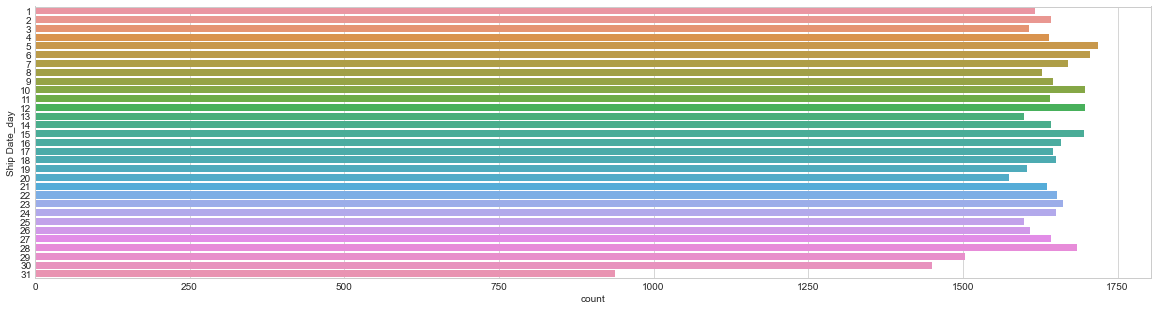

In [34]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='Ship Date_day',data=x);
print(x['Ship Date_day'].value_counts())

3     4515
5     4461
7     4435
6     4362
8     4266
4     4246
1     4206
10    3933
12    3927
2     3913
9     3869
11    3867
Name: Ship Date_month, dtype: int64


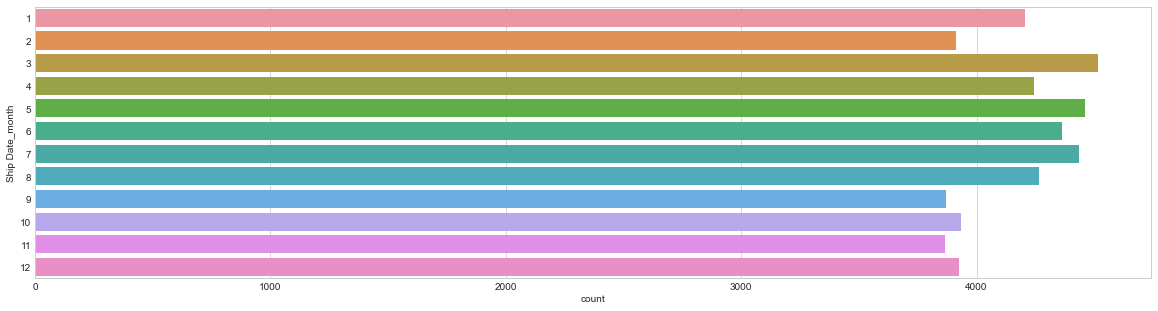

In [35]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='Ship Date_month',data=x);
print(x['Ship Date_month'].value_counts())

2011    6787
2012    6620
2016    6611
2014    6581
2013    6547
2015    6522
2010    6107
2017    4225
Name: Ship Date_year, dtype: int64


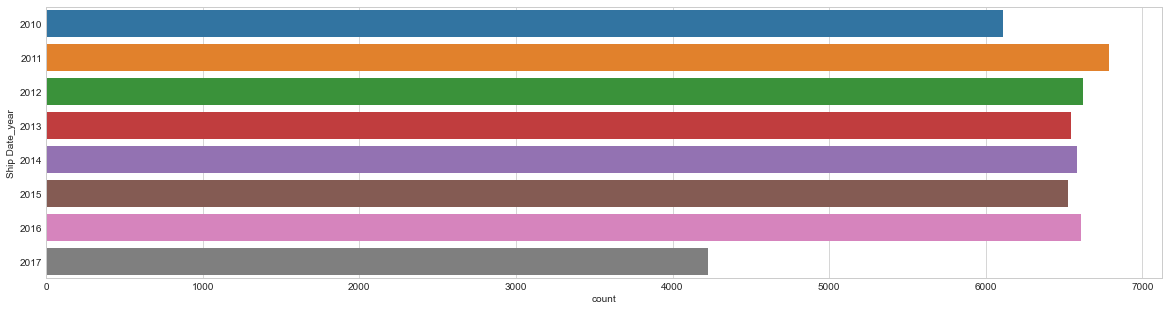

In [36]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='Ship Date_year',data=x);
print(x['Ship Date_year'].value_counts())

In [37]:
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,Household,Offline,M,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,Europe,Iceland,Baby Food,Online,H,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,Europe,Russia,Meat,Online,L,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,Europe,Moldova,Meat,Online,L,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,Europe,Malta,Cereal,Online,M,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


In [38]:
Order_Priority_dict = {'L':1, 'M':2, 'H':3, 'C':4}
x['Order Priority'] = x['Order Priority'].map(Order_Priority_dict)
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,Household,Offline,2,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,Europe,Iceland,Baby Food,Online,3,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,Europe,Russia,Meat,Online,1,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,Europe,Moldova,Meat,Online,1,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,Europe,Malta,Cereal,Online,2,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


In [39]:
x['Item Type'].value_counts()

Meat               4221
Fruits             4221
Cosmetics          4193
Vegetables         4191
Personal Care      4186
Beverages          4173
Snacks             4163
Clothes            4155
Cereal             4141
Office Supplies    4139
Household          4139
Baby Food          4078
Name: Item Type, dtype: int64

In [40]:
Item_Type_dict = {'Meat':1,'Fruits':2,'Cosmetics':3,'Vegetables':4,'Personal Care':5,'Beverages':6,'Snacks':7,
                 'Clothes':8, 'Cereal':9, 'Household':0, 'Office Supplies':10 , 'Baby Food':11}
x['Item Type'] = x['Item Type'].map(Item_Type_dict)
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,0,Offline,2,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,Europe,Iceland,11,Online,3,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,Europe,Russia,1,Online,1,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,Europe,Moldova,1,Online,1,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,Europe,Malta,9,Online,2,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


In [41]:
x['Sales Channel'].value_counts()

Online     25034
Offline    24966
Name: Sales Channel, dtype: int64

In [42]:
Sales_Channel_dict = {'Online':0 , 'Offline':1}
x['Sales Channel'] = x['Sales Channel'].map(Sales_Channel_dict)
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,0,1,2,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,Europe,Iceland,11,0,3,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,Europe,Russia,1,0,1,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,Europe,Moldova,1,0,1,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,Europe,Malta,9,0,2,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


In [43]:
x['Region'].value_counts()

Sub-Saharan Africa                   13116
Europe                               12841
Asia                                  7348
Middle East and North Africa          6128
Central America and the Caribbean     5451
Australia and Oceania                 4017
North America                         1099
Name: Region, dtype: int64

In [44]:
Region_dict = {'Sub-Saharan Africa':0,'Europe':1,'Asia':2,'Middle East and North Africa':3,
              'Central America and the Caribbean':4,'Australia and Oceania':5,'North America':6}
x['Region'] = x['Region'].map(Region_dict)

In [45]:
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0,Namibia,0,1,2,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,1,Iceland,11,0,3,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,1,Russia,1,0,1,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,1,Moldova,1,0,1,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,1,Malta,9,0,2,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


In [46]:
x['Country'].value_counts()

Trinidad and Tobago    321
Guinea                 318
Cape Verde             315
Maldives               311
Finland                310
                      ... 
Yemen                  238
Iran                   238
Armenia                237
Monaco                 236
Malawi                 233
Name: Country, Length: 185, dtype: int64

In [47]:
# Import label encoder 
from sklearn import preprocessing   
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()   
# Encode labels in column 'Country'. 
x['Country']= label_encoder.fit_transform(x['Country'])
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0,111,0,1,2,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,1,67,11,0,3,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,1,132,1,0,1,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,1,104,1,0,1,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,1,99,9,0,2,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


In [48]:
#x.drop('Units Sold',axis=1,inplace=True)
#x.drop('Unit Price',axis=1,inplace=True)
#x.drop('Unit Cost',axis=1,inplace=True)
#x.head()

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
x[['Region','Country','Item Type','Sales Channel','Order Priority','Total Revenue','Total Cost']] = scaler.fit_transform(x[['Region','Country','Item Type','Sales Channel','Order Priority','Total Revenue','Total Cost']])
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0.000000,0.603261,0.000000,1.0,0.333333,3604,668.27,502.54,0.360433,0.345040,597290.92,2015,8,31,2015,10,12
1,0.166667,0.364130,1.000000,0.0,0.666667,8435,255.28,159.42,0.322247,0.256177,808579.10,2010,11,20,2011,1,9
2,0.166667,0.717391,0.090909,0.0,0.000000,4848,421.89,364.69,0.306090,0.336822,277305.60,2017,6,22,2017,6,25
3,0.166667,0.565217,0.090909,0.0,0.000000,7225,421.89,364.69,0.456170,0.501969,413270.00,2012,2,28,2012,3,20
4,0.166667,0.538043,0.818182,0.0,0.333333,1975,205.70,117.11,0.060795,0.044060,174965.25,2010,8,12,2010,9,13


In [50]:
x[['Units Sold','Unit Price','Unit Cost']] = scaler.fit_transform(x[['Units Sold','Unit Price','Unit Cost']])
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0.000000,0.603261,0.000000,1.0,0.333333,0.360336,1.000000,0.956721,0.360433,0.345040,597290.92,2015,8,31,2015,10,12
1,0.166667,0.364130,1.000000,0.0,0.666667,0.843484,0.373251,0.294379,0.322247,0.256177,808579.10,2010,11,20,2011,1,9
2,0.166667,0.717391,0.090909,0.0,0.000000,0.484748,0.626096,0.690622,0.306090,0.336822,277305.60,2017,6,22,2017,6,25
3,0.166667,0.565217,0.090909,0.0,0.000000,0.722472,0.626096,0.690622,0.456170,0.501969,413270.00,2012,2,28,2012,3,20
4,0.166667,0.538043,0.818182,0.0,0.333333,0.197420,0.298009,0.212706,0.060795,0.044060,174965.25,2010,8,12,2010,9,13


In [51]:
x[['Order Date_year','Order Date_month','Order Date_day','Ship Date_year','Ship Date_month','Ship Date_day']] = scaler.fit_transform(x[['Order Date_year','Order Date_month','Order Date_day','Ship Date_year','Ship Date_month','Ship Date_day']])
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0.000000,0.603261,0.000000,1.0,0.333333,0.360336,1.000000,0.956721,0.360433,0.345040,597290.92,0.714286,0.636364,1.000000,0.714286,0.818182,0.366667
1,0.166667,0.364130,1.000000,0.0,0.666667,0.843484,0.373251,0.294379,0.322247,0.256177,808579.10,0.000000,0.909091,0.633333,0.142857,0.000000,0.266667
2,0.166667,0.717391,0.090909,0.0,0.000000,0.484748,0.626096,0.690622,0.306090,0.336822,277305.60,1.000000,0.454545,0.700000,1.000000,0.454545,0.800000
3,0.166667,0.565217,0.090909,0.0,0.000000,0.722472,0.626096,0.690622,0.456170,0.501969,413270.00,0.285714,0.090909,0.900000,0.285714,0.181818,0.633333
4,0.166667,0.538043,0.818182,0.0,0.333333,0.197420,0.298009,0.212706,0.060795,0.044060,174965.25,0.000000,0.636364,0.366667,0.000000,0.727273,0.400000


In [52]:
x.skew()

Region              0.638936
Country            -0.003622
Item Type           0.009011
Sales Channel       0.002720
Order Priority      0.005178
Units Sold         -0.012964
Unit Price          0.735888
Unit Cost           0.893408
Total Revenue       1.581942
Total Cost          1.756618
Total Profit        1.292324
Order Date_year     0.051303
Order Date_month    0.061570
Order Date_day     -0.005490
Ship Date_year      0.038203
Ship Date_month     0.046113
Ship Date_day       0.018445
dtype: float64

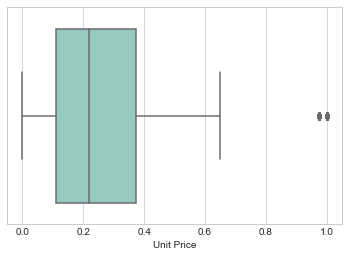

In [113]:
sns.boxplot(x['Unit Price'],palette = "Set3")

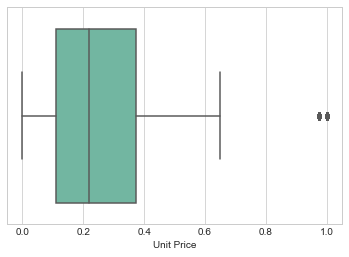

In [106]:
sns.boxplot(x['Unit Price'],palette = "Set2")

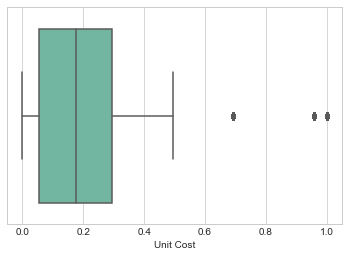

In [107]:
sns.boxplot(x['Unit Cost'],palette = "Set2")

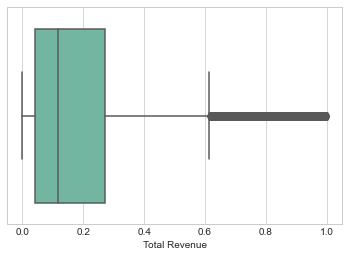

In [53]:
sns.boxplot(x['Total Revenue'],palette = "Set2")

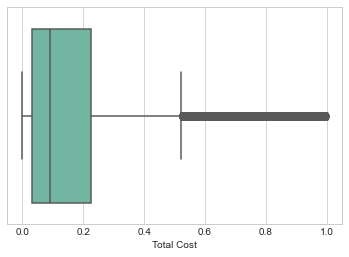

In [54]:
sns.boxplot(x['Total Cost'],palette = "Set2")

In [55]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return (lower_range,upper_range)

In [56]:
lowerbound,upperbound = outlier_treatment(x['Total Cost'])

In [57]:
lowerbound

-0.2636690099154394

In [58]:
upperbound

0.5210459197232762

In [59]:
x[(x['Total Cost'] < lowerbound) | (x['Total Cost'] > upperbound)]['Total Cost']

22       0.912591
27       0.919792
34       0.600855
49       0.977798
55       0.622165
           ...   
49973    0.684531
49976    0.843684
49978    0.867776
49984    0.761697
49996    0.580356
Name: Total Cost, Length: 4856, dtype: float64

In [60]:
Total_Cost_median = np.median(x['Total Cost'])
Total_Cost_median

0.08898426651438628

In [61]:
x.drop(x[(x['Total Cost'] > upperbound) | (x['Total Cost'] < lowerbound) ].index , inplace=True)

In [62]:
x[(x['Total Cost'] < lowerbound) | (x['Total Cost'] > upperbound)]['Total Cost']

Series([], Name: Total Cost, dtype: float64)

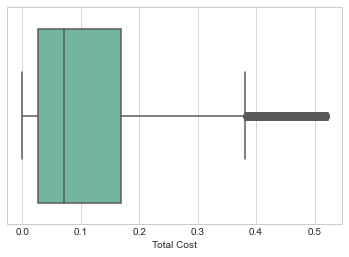

In [63]:
sns.boxplot(x['Total Cost'],palette = "Set2")

In [64]:
lowerbound,upperbound = outlier_treatment(x['Total Revenue'])

In [65]:
lowerbound

-0.22485784593410002

In [66]:
upperbound

0.4683643072160268

In [67]:
x[(x['Total Revenue'] < lowerbound) | (x['Total Revenue'] > upperbound)]['Total Revenue']

9        0.517608
25       0.540509
31       0.522050
39       0.651543
44       0.475587
           ...   
49895    0.521350
49896    0.486308
49924    0.513349
49944    0.522250
49980    0.599722
Name: Total Revenue, Length: 1718, dtype: float64

In [68]:
x.drop(x[(x['Total Revenue'] > upperbound) | (x['Total Revenue'] < lowerbound) ].index , inplace=True)

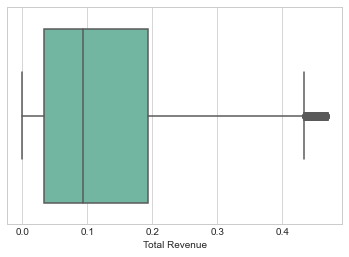

In [69]:
sns.boxplot(x['Total Revenue'],palette = "Set2")

In [70]:
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0.000000,0.603261,0.000000,1.0,0.333333,0.360336,1.000000,0.956721,0.360433,0.345040,597290.92,0.714286,0.636364,1.000000,0.714286,0.818182,0.366667
1,0.166667,0.364130,1.000000,0.0,0.666667,0.843484,0.373251,0.294379,0.322247,0.256177,808579.10,0.000000,0.909091,0.633333,0.142857,0.000000,0.266667
2,0.166667,0.717391,0.090909,0.0,0.000000,0.484748,0.626096,0.690622,0.306090,0.336822,277305.60,1.000000,0.454545,0.700000,1.000000,0.454545,0.800000
3,0.166667,0.565217,0.090909,0.0,0.000000,0.722472,0.626096,0.690622,0.456170,0.501969,413270.00,0.285714,0.090909,0.900000,0.285714,0.181818,0.633333
4,0.166667,0.538043,0.818182,0.0,0.333333,0.197420,0.298009,0.212706,0.060795,0.044060,174965.25,0.000000,0.636364,0.366667,0.000000,0.727273,0.400000


In [71]:
len(x)

43426

In [72]:
x = df.drop('Total Profit',axis = 1)
y = pd.DataFrame()
y = df['Total Profit']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [74]:
x_train.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
27934,0.500000,0.760870,0.454545,0.0,0.0,0.572857,0.109873,0.096035,0.070069,0.061848,0.000000,0.909091,0.400000,0.000000,1.000000,0.133333
31544,0.333333,0.576087,1.000000,0.0,0.0,0.201920,0.373251,0.294379,0.077168,0.061346,0.857143,1.000000,0.466667,0.857143,1.000000,0.533333
21633,0.000000,0.293478,0.363636,1.0,0.0,0.356136,0.219641,0.162169,0.082121,0.061701,0.285714,0.090909,0.533333,0.285714,0.181818,0.566667
17757,0.000000,0.548913,0.545455,1.0,0.0,0.608261,0.057850,0.048008,0.043192,0.036837,0.428571,0.727273,0.900000,0.428571,0.818182,0.366667
15755,0.333333,0.967391,0.000000,0.0,0.0,0.393239,1.000000,0.956721,0.393337,0.376538,0.000000,0.363636,0.633333,0.000000,0.454545,0.533333


In [75]:
x_test.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
18963,0.000000,0.086957,1.000000,0.0,0.000000,0.136014,0.373251,0.294379,0.051992,0.041331,0.571429,0.818182,0.533333,0.571429,0.909091,0.866667
24668,0.666667,0.353261,0.181818,1.0,0.666667,0.021802,0.000000,0.000000,0.000302,0.000285,0.285714,0.272727,0.900000,0.285714,0.363636,0.133333
35130,0.000000,0.152174,0.272727,1.0,0.333333,0.373837,0.649331,0.494962,0.244637,0.187571,0.428571,0.909091,0.066667,0.428571,0.909091,0.800000
36968,0.166667,0.201087,0.272727,1.0,0.000000,0.392739,0.649331,0.494962,0.257003,0.197053,1.000000,0.363636,0.866667,1.000000,0.454545,0.866667
4974,0.333333,0.092391,0.636364,1.0,0.000000,0.054305,0.217395,0.174736,0.012418,0.010095,0.000000,1.000000,0.366667,0.000000,1.000000,0.966667


In [76]:
x_train.shape

(29095, 16)

In [77]:
x_test.shape

(14331, 16)

In [78]:
y_train.shape

(29095,)

In [79]:
y_test.shape

(14331,)

In [80]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [81]:
acc = round(regr.score(x_train,y_train)*100,2)
#train_pred=model_selection.cross_val_predict(regr,x_train,y_train,cv=10,n_jobs=-1)
print("Accuracy: %s" % acc) 

Accuracy: 74.91


In [134]:
from sklearn import svm
svm_reg = svm.SVR()
svm_reg.fit(x_train, y_train)

SVR()

In [135]:
acc = round(svm_reg.score(x_train,y_train)*100,2)
#train_pred=model_selection.cross_val_predict(svm_reg,x_train,y_train,cv=10,n_jobs=-1)
print("Accuracy: %s" % acc) 

Accuracy: -7.76


In [136]:
pred_svm = svm_reg.predict(x_test)

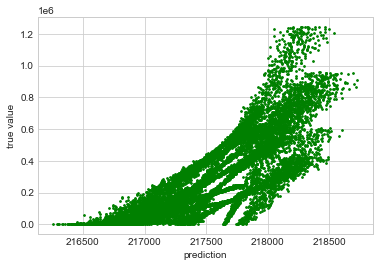

In [137]:
plt.scatter(pred_svm,y_test, c ="green" , s = 3) 
plt.xlabel("prediction") 
plt.ylabel("true value") 
plt.show()

In [84]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
pred = reg.predict(x_test)
acc = round(reg.score(x_train,y_train)*100,2)
print("Accuracy: %s" % acc) 

Accuracy: 100.0


In [85]:
from sklearn.ensemble import GradientBoostingRegressor
reg_grad = GradientBoostingRegressor(max_depth=2)
reg_grad.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=2)

In [86]:
acc = round(reg_grad.score(x_train,y_train)*100,2)
print("Accuracy: %s" % acc) 

Accuracy: 99.11


In [87]:
from sklearn.neighbors import KNeighborsRegressor
regn = KNeighborsRegressor(n_neighbors=6)
regn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [88]:
acc = round(regn.score(x_train,y_train)*100,2)
#train_pred=model_selection.cross_val_predict(regn,x_train,y_train,cv=10,n_jobs=-1)
print("Accuracy: %s" % acc) 

Accuracy: 84.84


In [89]:
pred_grad = reg_grad.predict(x_test)
predr = regr.predict(x_test)
predn = regn.predict(x_test)

In [90]:
pred_grad

array([1.32558770e+05, 6.78200759e+02, 6.18982354e+05, ...,
       7.11106999e+05, 2.41257610e+05, 1.92004963e+05])

In [91]:
predr

array([ 80127.77775933,  53369.10413477, 584963.93705035, ...,
       606910.62101264, 224691.67143571,  53369.10413477])

In [92]:
predn

array([210032.11333333,  32778.61833333, 870972.78666667, ...,
       706775.78      , 276179.96166667, 223092.98      ])

In [93]:
mean_squared_error(y_test, pred_grad)

624117297.2960188

In [94]:
mean_squared_error(y_test, predr)

16985014950.648909

In [95]:
mean_squared_error(y_test, predn)

14930539297.963215

In [96]:
mean_squared_error(y_test, pred)

9.246951929223182e-19

In [97]:
rmse_grad = mean_squared_error(y_test, pred_grad,squared=False)

In [98]:
rmse_r = mean_squared_error(y_test, predr,squared=False)

In [99]:
rmse_n = mean_squared_error(y_test, predn,squared=False)

In [100]:
rmse = mean_squared_error(y_test, pred,squared=False)

In [101]:
print(rmse_grad)
print(rmse_r)
print(rmse_n)
print(rmse)

24982.33970820225
130326.57039394886
122190.58596292602
9.616107283731387e-10


In [104]:
from sklearn.metrics import r2_score
r2_grad = r2_score(y_test, pred_grad)
r2_r = r2_score(y_test,predr)
r2_n = r2_score(y_test,predn)
r2_linereg = r2_score(y_test,pred)

In [105]:
print(r2_grad)
print(r2_r)
print(r2_n)
print(r2_linereg)

0.9907442286010592
0.7481091835270283
0.778577425744211
1.0


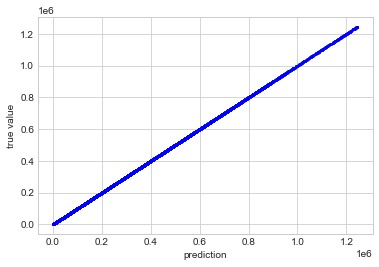

In [126]:
plt.scatter(pred,y_test, c ="blue" , s = 3) 
plt.xlabel("prediction") 
plt.ylabel("true value") 
plt.show()

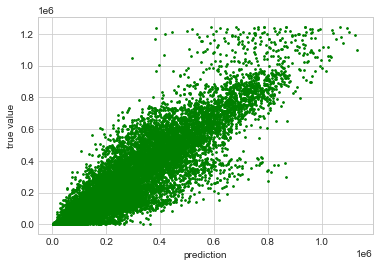

In [127]:
plt.scatter(predn,y_test, c ="green" , s = 3) 
plt.xlabel("prediction") 
plt.ylabel("true value") 
plt.show()

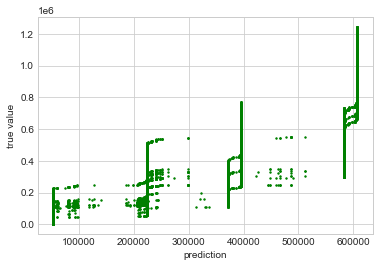

In [132]:
plt.scatter(predr,y_test, c ="green" ,s = 2)
plt.xlabel("prediction") 
plt.ylabel("true value") 
plt.show()

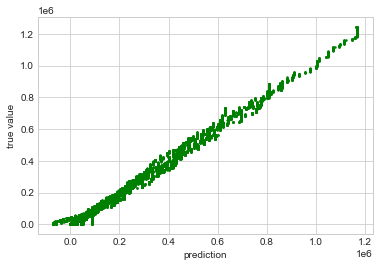

In [133]:
plt.scatter(pred_grad,y_test, c ="green" , s=2)
plt.xlabel("prediction") 
plt.ylabel("true value") 
plt.show()